In [1]:
#Data analysis practice with AIFS data from ECMWF 
#https://www.ecmwf.int/en/forecasts/datasets/open-data

In [2]:
import cfgrib 
import xarray as xr
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
file_pt="/Volumes/YagizHDD/Meteorological-Applications/DATA/AIFS/merged_20250228000000_00_to_48.grib2"
df = xr.open_dataset(file_pt,engine="cfgrib")

skipping variable: paramId==228026 shortName='mx2t3'
Traceback (most recent call last):
  File "/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
    ~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
    ...<2 lines>...
    )
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=np.float64(10.0)) new_value=Variable(dimensions=(), data=np.float64(2.0))
skipping variable: paramId==228027 shortName='mn2t3'
Traceback (most recent call last):
  File "/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
    ~~~~~~~~~~^^^^^^^^^^

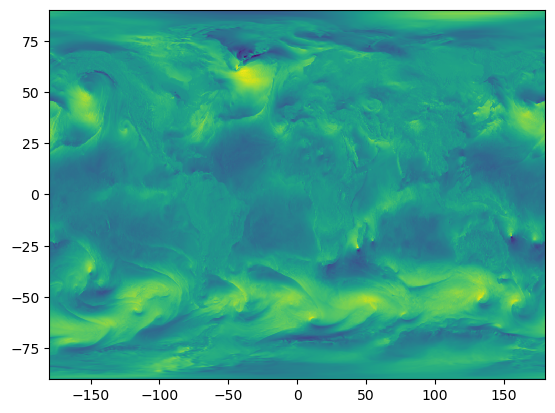

In [4]:

plt.pcolormesh(df.longitude,df.latitude,df.u[0,0,:,:])


In [6]:
df


<xarray.Dataset> Size: 4GB
Dimensions:             (step: 7, latitude: 721, longitude: 1440,
                         isobaricInhPa: 13, soilLayer: 4)
Coordinates: (12/13)
    time                datetime64[ns] 8B ...
  * step                (step) timedelta64[ns] 56B 0 days 12:00:00 ... 2 days...
    surface             float64 8B ...
  * latitude            (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude           (longitude) float64 12kB -180.0 -179.8 ... 179.5 179.8
    valid_time          (step) datetime64[ns] 56B ...
    ...                  ...
  * soilLayer           (soilLayer) float64 32B 1.0 2.0 3.0 4.0
    entireAtmosphere    float64 8B ...
    nominalTop          float64 8B ...
    heightAboveGround   float64 8B ...
    meanSea             float64 8B ...
    mostUnstableParcel  float64 8B ...
Data variables: (12/37)
    ssr                 (step, latitude, longitude) float32 29MB ...
    q                   (step, isobaricInhPa, latitude, longitude) float32 378MB ...
    vsw                 (step, soilLayer, latitude, longitude) float32 116MB ...
    tcwv                (step, latitude, longitude) float32 29MB ...
    str                 (step, latitude, longitude) float32 29MB ...
    sot                 (step, soilLayer, latitude, longitude) float32 116MB ...
    ...                  ...
    ssrd                (step, latitude, longitude) float32 29MB ...
    lsm                 (step, latitude, longitude) float32 29MB ...
    sithick             (step, latitude, longitude) float32 29MB ...
    strd                (step, latitude, longitude) float32 29MB ...
    sp                  (step, latitude, longitude) float32 29MB ...
    tcw                 (step, latitude, longitude) float32 29MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-01T14:17 GRIB to CDM+CF via cfgrib-0.9.1...

Text(0.5, 1.0, 'Wind Speed Change Vertical')

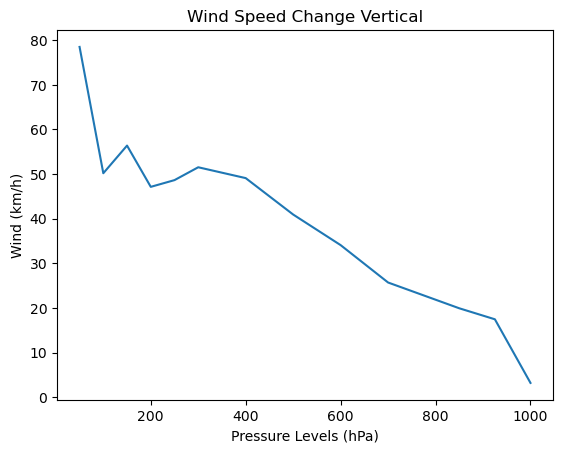

In [185]:
levels = df.isobaricInhPa
wind=df.u[0,0:len(levels),int(45/0.25),int((45/0.25)+(180/0.25))]*3.6
plt.plot(levels,wind) # Vertical wind speed change according to 
plt.xlabel("Pressure Levels (hPa)")
plt.ylabel("Wind (km/h)")
plt.title( "Wind Speed Change Vertical")

Text(0.5, 1.0, 'Temperature Change Vertical')

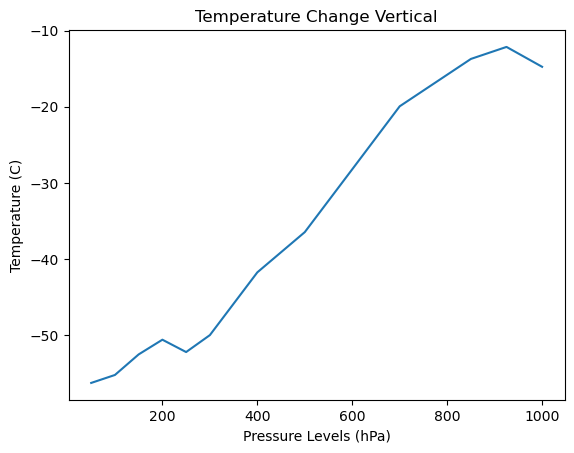

In [184]:
temp=df.t[0,0:len(levels),int(45/0.25),int((45/0.25)+(180/0.25))]-273.15
plt.plot(levels,temp) # Vertical wind speed change according to 
plt.xlabel("Pressure Levels (hPa)")
plt.ylabel("Temperature (C)")
plt.title( "Temperature Change Vertical")

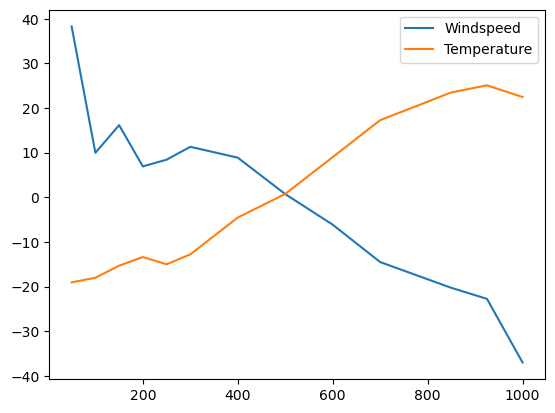

In [190]:
plt.plot(levels,wind-wind.mean(),label="Windspeed")
plt.plot(levels,temp-temp.mean(),label = "Temperature")
plt.legend()


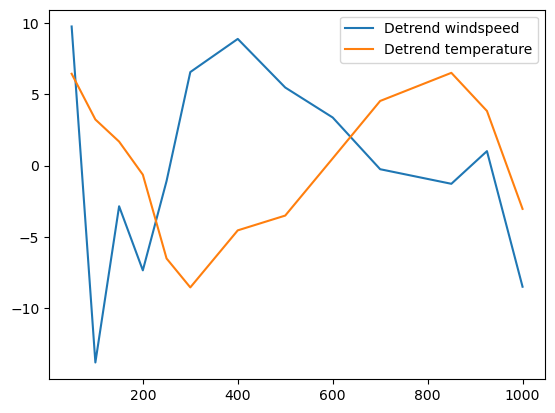

In [194]:
#DETREND
from scipy.signal import detrend
plt.plot(levels,detrend(wind,type="linear"),label="Detrend windspeed")
plt.plot(levels,detrend(temp,type="linear"),label="Detrend temperature")
plt.legend()

In [57]:
lat=df.latitude[(int(48/0.25)):(int(53/0.25))]
lon=df.longitude[(int((25/0.25)+(180/0.25))):(int((30/0.25)+(180/0.25)))]
            

Text(0.5, 1.0, '28 February 00:00 UTC Forecast AIFS')

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


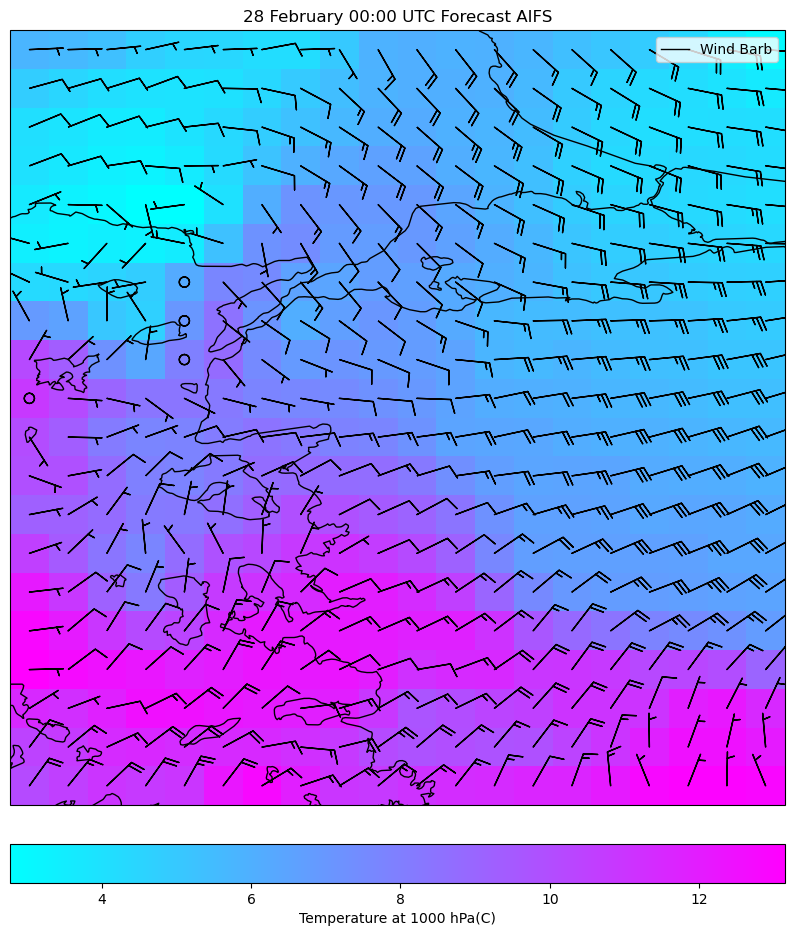

In [ ]:
wind_1000_u= df.u[0,0,(int(45/0.25)):(int(50/0.25)),(int((25/0.25)+(180/0.25))):(int((30/0.25)+(180/0.25)))]*3.6
wind_1000_v= df.v[0,0,(int(45/0.25)):(int(50/0.25)),(int((25/0.25)+(180/0.25))):(int((30/0.25)+(180/0.25)))]*3.6
temp_1000= df.t[0,0,(int(45/0.25)):(int(50/0.25)),(int((25/0.25)+(180/0.25))):(int((30/0.25)+(180/0.25)))]-273.15

import cartopy.crs as ccrs
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(10,15),subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
b=plt.pcolormesh(lon,lat,temp_1000,cmap="cool")
plt.barbs(lon,lat,wind_1000_u,wind_1000_v)
a=plt.colorbar(b,orientation="horizontal",anchor=(0, 2), shrink=1)
legend_handles = [
    Line2D([0], [0], color="black", lw=1, label="Wind (km/h) Barb")
]
# Add legend
plt.legend(handles=legend_handles, loc="upper right")
a.set_label("Temperature at 1000 hPa(C)")
plt.title("28 February 00:00 UTC Forecast AIFS ")